<a href="https://colab.research.google.com/github/HandsomeJames0223/Deep_Learning/blob/main/cnn(109_10_22).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
trans = [
         "airplane",
         "automobile",
         "bird",
         "cat",										
         "deer",										
         "dog",									
         "frog",								
         "horse",										
         "ship",										
         "truck"
]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


ans: cat


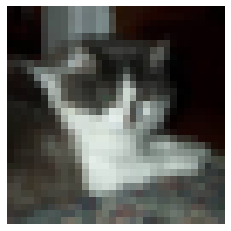

In [ ]:
import random
import matplotlib.pyplot as plt

idx = random.randint(0, x_train.shape[0]-1)
print("ans:", trans[y_train[idx][0]])
plt.axis("off")
plt.imshow(x_train[idx])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
layers = [Conv2D(64, 3, padding = "same", activation = "relu", input_shape = (32, 32, 3)),
          MaxPooling2D(),
          Conv2D(128, 3, padding = "same", activation = "relu"),
          MaxPooling2D(),
          Conv2D(256, 3, padding = "same", activation = "relu"),
          MaxPooling2D(),
          Flatten(),
          Dense(256, activation="relu"),
          Dropout(0.25),
          Dense(128, activation="relu"),
          Dropout(0.25),
          Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss = SparseCategoricalCrossentropy(),
              optimizer = Adam(),
              metrics = ["accuracy"])

In [ ]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(x_train_norm, 
     y_train,
     batch_size=100,
     epochs=50,
     validation_split=0.1,
     callbacks=callbacks,
     verbose=2)

Epoch 1/50
450/450 - 4s - loss: 1.6681 - accuracy: 0.3825 - val_loss: 1.2459 - val_accuracy: 0.5532
Epoch 2/50
450/450 - 4s - loss: 1.1860 - accuracy: 0.5753 - val_loss: 0.9761 - val_accuracy: 0.6600
450/450 - 4s - loss: 0.6360 - accuracy: 0.7778 - val_loss: 0.7358 - val_accuracy: 0.7562
Epoch 7/50
450/450 - 4s - loss: 0.5489 - accuracy: 0.8090 - val_loss: 0.6738 - val_accuracy: 0.7796
Epoch 8/50
450/450 - 4s - loss: 0.4917 - accuracy: 0.8275 - val_loss: 0.7171 - val_accuracy: 0.7628
Epoch 9/50
450/450 - 4s - loss: 0.4188 - accuracy: 0.8544 - val_loss: 0.7264 - val_accuracy: 0.7728
Epoch 10/50
450/450 - 4s - loss: 0.3734 - accuracy: 0.8683 - val_loss: 0.7369 - val_accuracy: 0.7816
Epoch 11/50
450/450 - 4s - loss: 0.3303 - accuracy: 0.8838 - val_loss: 0.7311 - val_accuracy: 0.7788
Epoch 12/50
450/450 - 4s - loss: 0.2862 - accuracy: 0.9009 - val_loss: 0.8251 - val_accuracy: 0.7760


In [ ]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7241 - accuracy: 0.7596


[0.724147617816925, 0.7595999836921692]

In [ ]:
pre = model.predict_classes(x_test_norm)
print(pre.shape)
print(y_test.shape)
y_test_r = y_test.reshape(10000)
print(y_test_r.shape)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
(10000,)
(10000, 1)
(10000,)


array([3, 8, 8, ..., 5, 4, 7])

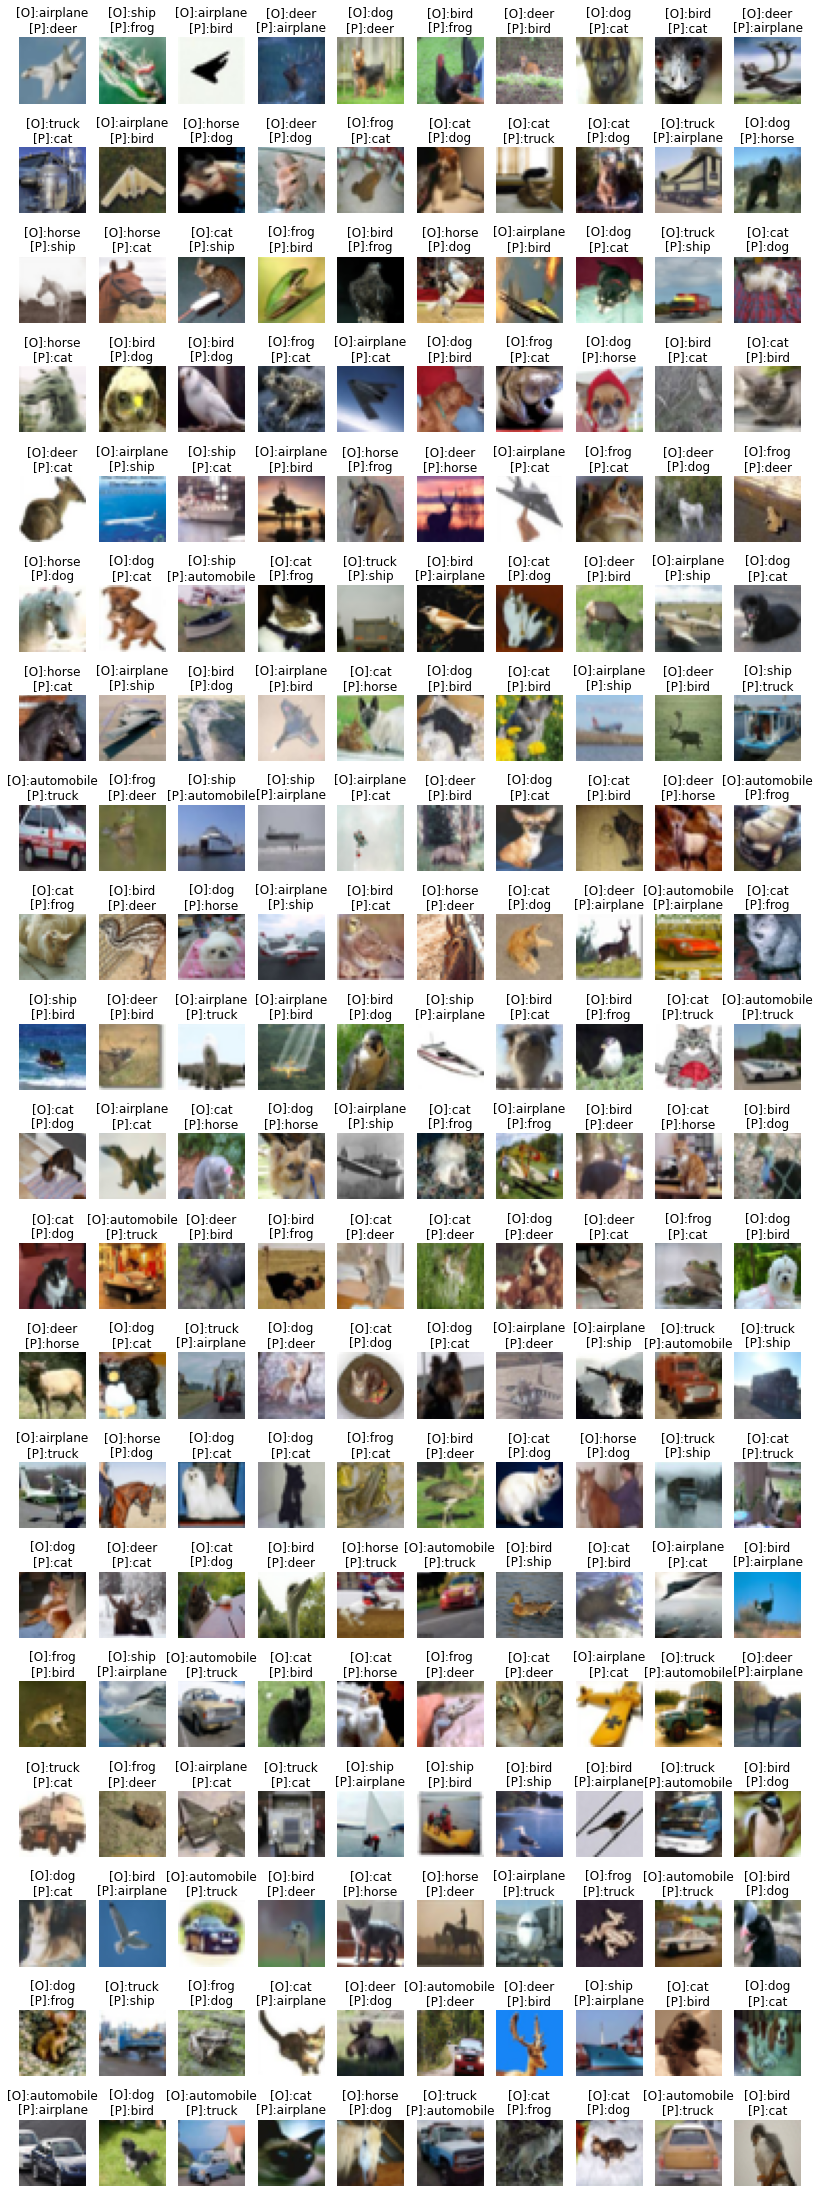

In [ ]:
# subplot(總高度, 總寬度, ith)
import numpy as np
idx = np.nonzero(pre != y_test_r)[0]
idx = idx[:200]
false_img = x_test[idx]
false_label = y_test_r[idx]
false_pre = pre[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(false_img) // width + 1
for i in range(len(false_img)):
    plt.subplot(height, width, i+1)
    title = "[O]:{}\n[P]:{}".format(trans[false_label[i]], trans[false_pre[i]])
    plt.title(title)
    plt.axis("off")
    plt.imshow(false_img[i])

輸入網址:https://as.chdev.tw/web/article/b/0/4/b1814323-0790-4b70-a3b1-6cbc87d37d1f/A0951614.jpg


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


airplane 的機率是: 0.005
automobile 的機率是: 0.001
bird 的機率是: 0.037
cat 的機率是: 0.277
deer 的機率是: 0.001
dog 的機率是: 0.641
frog 的機率是: 0.031
horse 的機率是: 0.002
ship 的機率是: 0.002
truck 的機率是: 0.001
應該是: dog


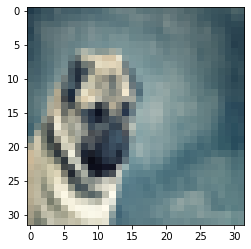

In [ ]:
# pip install pillow
import PIL
import requests
url = input("輸入網址:")
h = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36"
}
response = requests.get(url, stream=True, verify=False, headers=h)
img = PIL.Image.open(response.raw).resize((32, 32))
img_np = np.array(img)
test = img_np.reshape(1, 32, 32, 3) / 255
probs = model.predict(test)[0]
for i, p in enumerate(probs):
    print(trans[i], "的機率是:", round(p, 3))
ans = model.predict_classes(test)[0]
print("應該是:", trans[ans])
plt.imshow(img_np)